# Data Cleaning

In [1]:
# Importing necessary libraries
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## All currencies dataset

In [2]:
df = pd.read_csv(
    filepath_or_buffer = '../data/all_currencies_table.csv',
    index_col = 0
)
df.head()

,name,symbol,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
number,,,,,,,,,
1,Bitcoin,BTC,1.507030e+11,8940.740000,1.685576e+07,8.103300e+09,-0.63,11.22,3.58
2,Ethereum,ETH,8.754697e+10,897.729000,9.752049e+07,3.062570e+09,-0.41,11.99,-0.25
3,Ripple,XRP,4.062771e+10,1.041490,3.900922e+10,2.504810e+09,-0.37,32.86,23.94
4,Bitcoin Cash,BCH,2.294639e+10,1353.040000,1.695914e+07,1.149550e+09,0.11,7.89,18.32
5,Cardano,ADA,1.163729e+10,0.448847,2.592707e+10,7.603720e+08,-0.71,27.62,23.61


### Metadata

- __Name__ -> Name of the CryptoCurrency.
- __Symbol__ -> Symbol of the CrytoCurrency.
- __Market Capitalization(in USD)__ -> The total market value of a cryptocurrency's circulating supply.  
$Market Cap = Current Price * Circulating Supply.$
- __Price(in USD)__ -> The current price at which an asset or service can be bought or sold.  
- __Circulating Supply__ -> The amount of coins that are circulating in the market and are in public hands.
- __Volume 24-Hour(in USD)__ -> A measure of how much quantity of a cryptocurrency was traded in the last 24 hours.
- __1 Hour(in \%)__ -> Trend for the last hour.
- __24 Hours(in \%)__ -> Trend for the last 24 hours.
- __7 days(in \%)__ -> Trend for the last 7 days.

In [3]:
df.tail()

,name,symbol,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
number,,,,,,,,,
1512,LiteCoin Gold,LTG,NaN,0.006132,NaN,NaN,NaN,8.37,-23.59
1513,eBIT,EBIT,NaN,0.004195,NaN,NaN,NaN,NaN,-38.75
1514,Faceblock,FBL,NaN,0.003230,NaN,NaN,NaN,NaN,-79.33
1515,Farstcoin,FRCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,Decentralized...,DUBI,NaN,123.813000,NaN,NaN,NaN,10.87,11.25


From the above dataset, we can tell that name could potentially act as the index of the dataset.  
To do the same, we need to make a few adjustments as seen from the mapping notebook.

## Name changes

In [4]:
p = pd.read_pickle(filepath_or_buffer = '../Data/Replacements.pkl')

In [5]:
def rip(l: str):
    for i in '()[]./+- ':
        l = l.replace(i, '')
    return l.lower()
df['name'] = df.name.apply(rip)
df['name'].replace(p[0], inplace = True)

In [6]:
d = df[df.duplicated(subset = 'name')].copy()
d

,name,symbol,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
number,,,,,,,,,
860,hempcoin,HMP,240320.248491,0.000177,1.356645e+09,574.643,-1.00,11.42,105.11
1054,enigma,XNG,197992.821499,0.343037,5.771763e+05,202.097,-0.99,18.05,2.58
1383,firstbitcoin,BITCF,NaN,0.240117,NaN,1186.050,-0.99,-32.45,8.73
1389,encryptotel,ETT,NaN,0.079232,NaN,949.529,-1.23,6.45,-2.17


In [7]:
df.drop_duplicates(subset = 'name', keep = 'last', inplace = True)

In [8]:
d.name.replace(p[2], inplace = True)

In [9]:
d.dropna(inplace = True)
d

,name,symbol,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
number,,,,,,,,,
860,hempcoinhmp,HMP,240320.248491,0.000177,1.356645e+09,574.643,-1.00,11.42,105.11
1054,enigmaproject,XNG,197992.821499,0.343037,5.771763e+05,202.097,-0.99,18.05,2.58


Now, we can append the same back to the original dataset.

In [10]:
df = df.append(d)

In [11]:
df = df[df.name.apply(lambda l: l not in p[1])]

Now that the necessary changes to name have been done, we can set it as the index.

In [12]:
df.set_index(
    keys = ['name', 'symbol'],
    inplace = True
)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1501 entries, ('bitcoin', 'BTC') to ('enigmaproject', 'XNG')
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   market_cap          1142 non-null   float64
 1   price               1499 non-null   float64
 2   circulating_supply  1119 non-null   float64
 3   volume_24hr         1487 non-null   float64
 4   1h                  1437 non-null   float64
 5   24h                 1450 non-null   float64
 6   7d                  1463 non-null   float64
dtypes: float64(7)
memory usage: 175.8+ KB


In [14]:
df.shape

(1501, 7)

In [15]:
df.apply(
    func = lambda l: l.isna().sum(),
    axis = 1
).value_counts()

0    1061
2     328
1      56
3      35
4      16
5       2
6       2
7       1
dtype: int64

We can choose to drop data with more than 2 missing values and apply filler techniques for the rest.

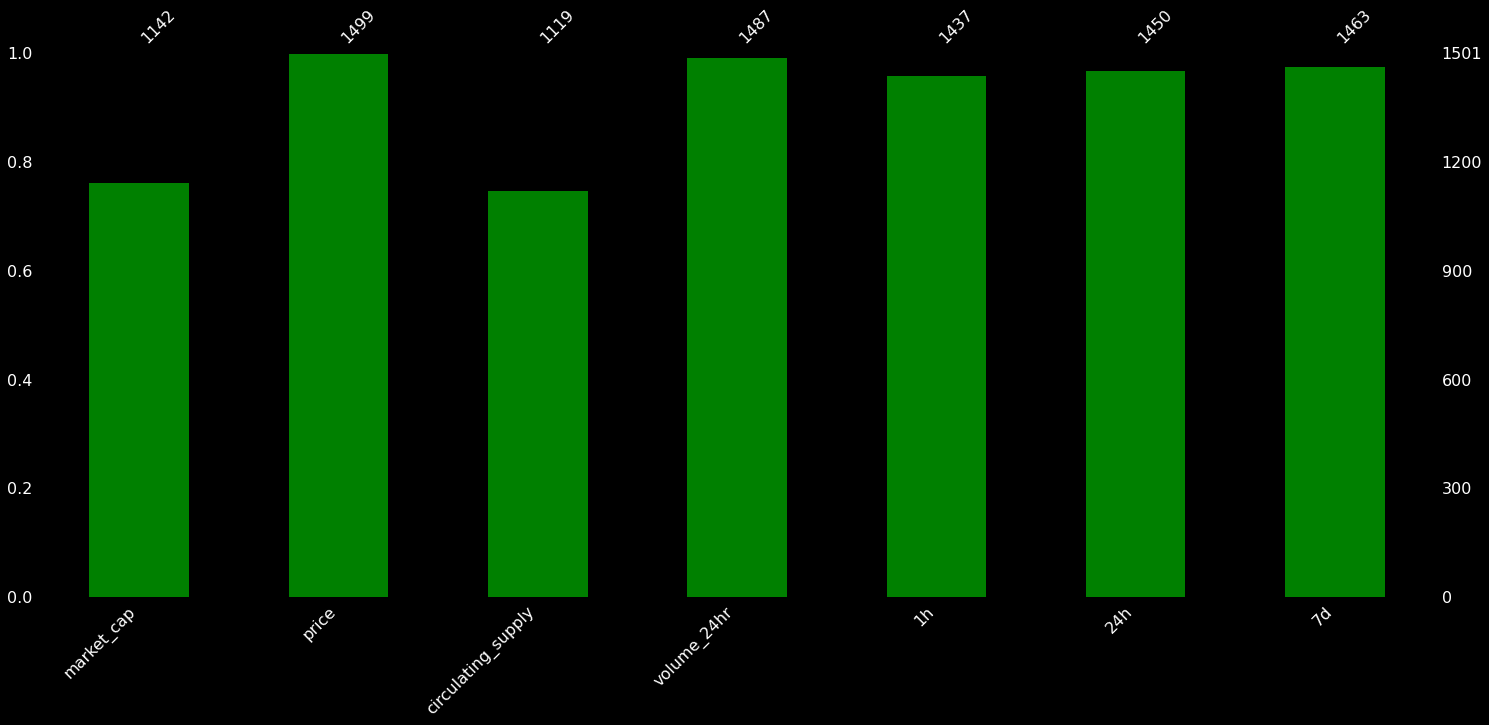

In [16]:
fig = msno.bar(
    df,
    color = 'green'
)
plt.show()

Leaving market_cap and circulating_supply, the number of missing values in the other features is quite low.

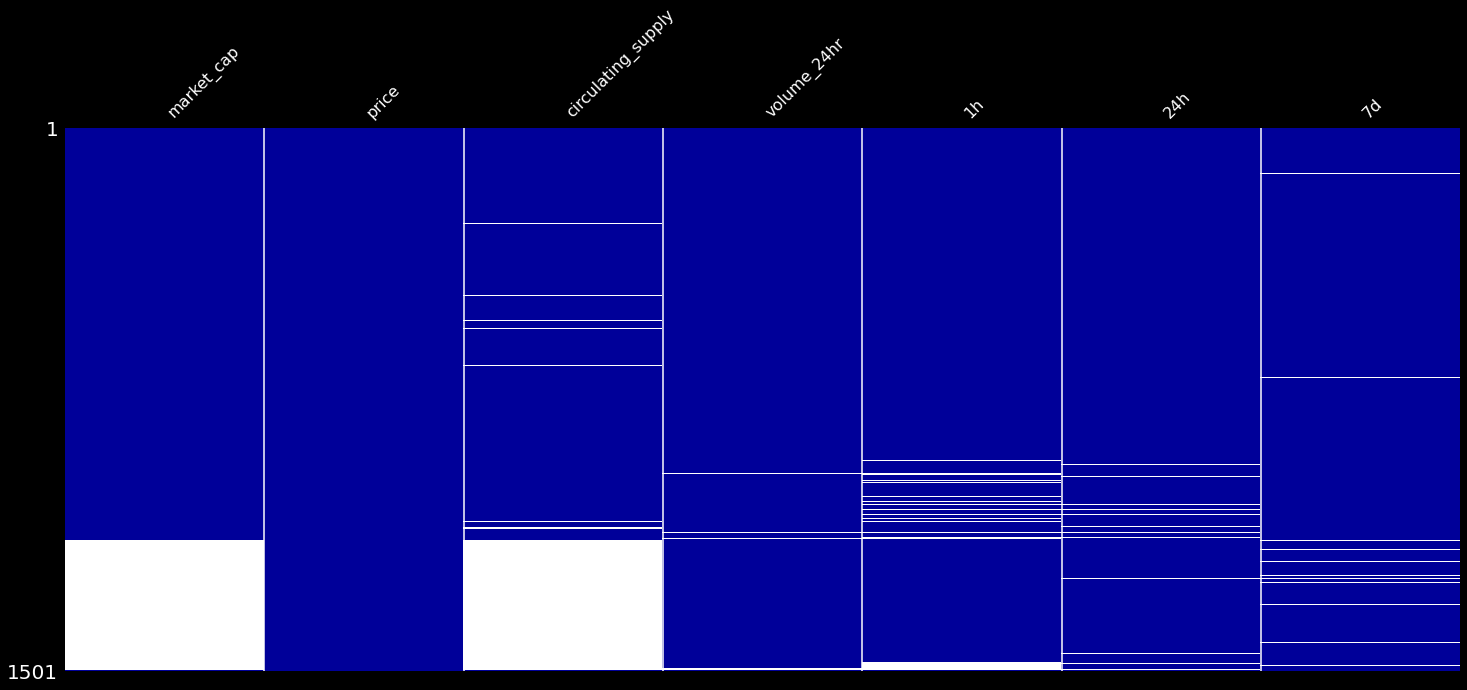

In [17]:
ax = msno.matrix(
    df,
    color = (0, 0, 0.6),
    sparkline = False
)
plt.show()

Here, we can see that there is high correspondence of nullity between market_cap and circulating_supply.  
For now lets fill all the other features with their respective means.

In [18]:
df[df.price.isna()]

,,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
name,symbol,,,,,,,
lltoken,LLT,NaN,NaN,NaN,0.0,NaN,NaN,NaN
firstbitcoincapital,FRCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For now we can ignore the price feature as the 2 data points will eventually be dropped eitherways.

In [19]:
def filler(l):
    mean = l.mean()
    l.fillna(mean, inplace = True)
    return l
names = df.columns[3:]
print(names)
df[names] = df[names].apply(func = filler)

Index(['volume_24hr', '1h', '24h', '7d'], dtype='object')


In [20]:
df.tail()

,,market_cap,price,circulating_supply,volume_24hr,1h,24h,7d
name,symbol,,,,,,,
faceblock,FBL,NaN,0.003230,NaN,1.669866e+07,-0.71247,13.828138,-79.330000
firstbitcoincapital,FRCT,NaN,NaN,NaN,1.669866e+07,-0.71247,13.828138,4.981012
decentralizeduniversalbasicincome,DUBI,NaN,123.813000,NaN,1.669866e+07,-0.71247,10.870000,11.250000
hempcoinhmp,HMP,240320.248491,0.000177,1.356645e+09,5.746430e+02,-1.00000,11.420000,105.110000
enigmaproject,XNG,197992.821499,0.343037,5.771763e+05,2.020970e+02,-0.99000,18.050000,2.580000


Now that NaNs are dealt with for the other features, we can look into circulating_supply and market_cap.  
Both these features are related through an equation that goes like -  
$Market Cap = Current Price * Circulating Supply.$  
It can be used to fill the NaNs in circulating_supply.  
Next, we can drop the common null data points between the two.

In [21]:
df['circulating_supply'] = df.apply(
    func = lambda l: l[0] / l[1] if pd.isna(l[2]) else l[2],
    axis = 1
)
df.dropna(inplace = True)
df.shape

(1142, 7)

We've gotten rid of 360 data points and applied filler methods for the remaining NaNs.  
Lets take a look at the bar chart to see if they're any more remaining.

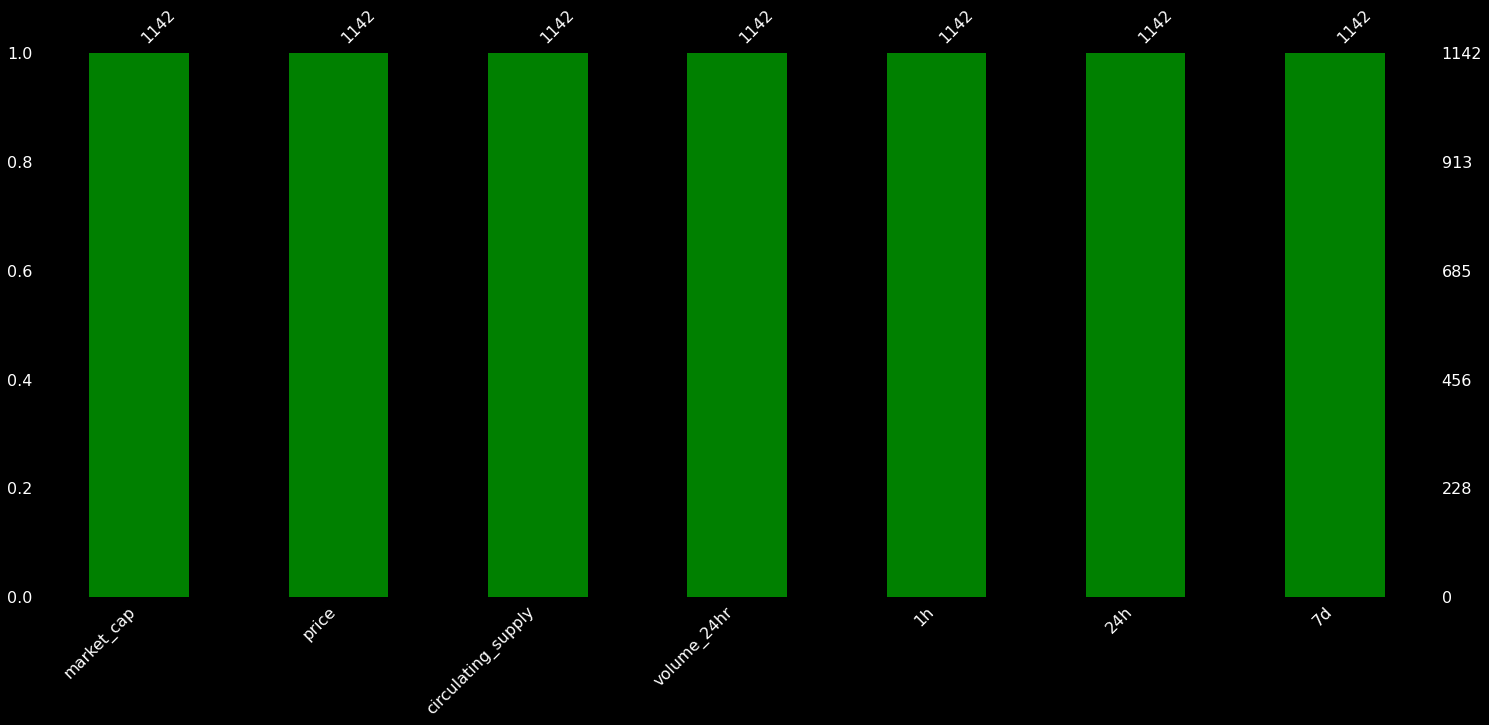

In [22]:
fig = msno.bar(
    df,
    color = 'green'
)
plt.show()

Now that we've gotten rid of all the NaNs, We can look to rename our features for ease of access during EDA.

In [23]:
df.rename(
    columns = {
        'market_cap': 'MarketCap',
        'price': 'Price',
        'circulating_supply': 'Circulate',
        'volume_24hr': 'Volume',
        '1h': 'Hourly',
        '24h': 'Daily',
        '7d': 'Weekly'
    },
    inplace = True
)
df.index.rename(names = ['Name', 'Symbol'], inplace = True)
df.head()

,,MarketCap,Price,Circulate,Volume,Hourly,Daily,Weekly
Name,Symbol,,,,,,,
bitcoin,BTC,1.507030e+11,8940.740000,1.685576e+07,8.103300e+09,-0.63,11.22,3.58
ethereum,ETH,8.754697e+10,897.729000,9.752049e+07,3.062570e+09,-0.41,11.99,-0.25
ripple,XRP,4.062771e+10,1.041490,3.900922e+10,2.504810e+09,-0.37,32.86,23.94
bitcoincash,BCH,2.294639e+10,1353.040000,1.695914e+07,1.149550e+09,0.11,7.89,18.32
cardano,ADA,1.163729e+10,0.448847,2.592707e+10,7.603720e+08,-0.71,27.62,23.61


In [24]:
df.to_csv(
    path_or_buf = '../data/all_currencies_clean_table.csv'
)

## CryptoCurrency Prices by Date Dataset

In [25]:
trend = pd.read_csv(
    filepath_or_buffer = '../data/cryptocurrency_prices_by_date.csv'
)
trend.head()

,currency,date,price
0,0x,1502892561000,0.111725
1,0x,1502982305000,0.211486
2,0x,1503068692000,0.283789
3,0x,1503155108000,0.511434
4,0x,1503241503000,0.429522


For this dataset, we could start off by bringing the date back to a usual format.

In [26]:
trend['date'] = pd.to_datetime(
    arg = trend.date,
    unit = 'ms'
).dt.strftime('%d-%m-%Y %H:%M:%S')
trend.tail()

,currency,date,price
657311,zurcoin,04-02-2018 07:09:10,0.003254
657312,zurcoin,05-02-2018 07:09:10,0.002774
657313,zurcoin,06-02-2018 07:44:10,0.001986
657314,zurcoin,09-02-2018 08:29:06,0.002684
657315,zurcoin,10-02-2018 03:54:06,0.002325


Next up, lets rename our features for ease of access.

In [27]:
trend.rename(
    columns = {
        'currency' : 'Coin',
        'date': 'Date',
        'price': 'Price'
    },
    inplace = True
)
trend.head()

,Coin,Date,Price
0,0x,16-08-2017 14:09:21,0.111725
1,0x,17-08-2017 15:05:05,0.211486
2,0x,18-08-2017 15:04:52,0.283789
3,0x,19-08-2017 15:05:08,0.511434
4,0x,20-08-2017 15:05:03,0.429522


We need to make some changes to the coin names.

In [28]:
trend['Coin'] = trend.Coin.apply(rip)

Lastly, we can drop data that doesn't have corresponding data back in the first dataset.

In [29]:
index = list(df.index.get_level_values('Name'))
trend = trend[trend.Coin.apply(lambda l: l in index)]
trend.reset_index(
    drop = True,
    inplace = True
)

Even though this dataset is quite long, there seems to be no better way to organize the same.

In [30]:
trend.to_csv(
    path_or_buf = '../Data/clean_cryptocurrency_prices_by_date.csv'
)